# Read data

In [1]:
from utils.EDA.analysis import *
from utils.EDA.visualize import *

In [2]:
%matplotlib inline
plt.style.use("ggplot")

In [3]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

# confirm missing values

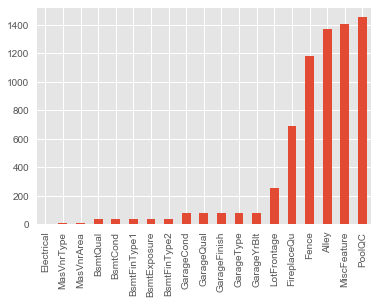

In [4]:
df_train_missing = df_train.isnull().sum()
df_train_missing = df_train_missing[df_train_missing > 0]
df_train_missing.sort_values(inplace = True)
df_train_missing.plot(kind = "bar")

In [5]:
df_train_missing

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

# Treat missing value

### 1. Electrical

##### 결측값 판단

Electrical의 카테고리값에는 Nan값이 없으므로 결측값으로 판단

##### 결측값 분석

In [6]:
df_train[df_train["Electrical"].isnull()]["SalePrice"]

1379    167500
Name: SalePrice, dtype: int64

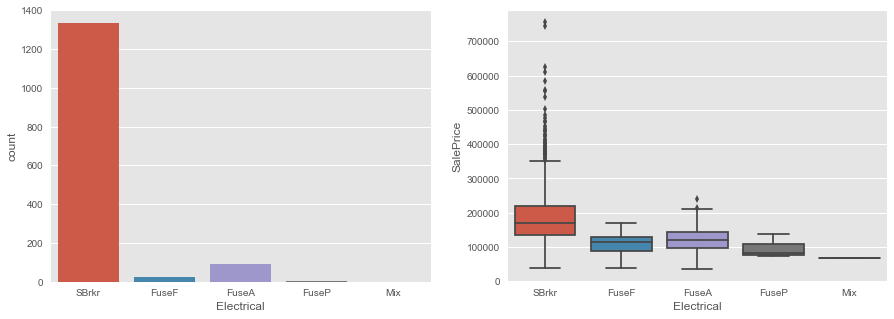

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
sns.countplot(df_train["Electrical"], ax = axes[0])
sns.boxplot(x = df_train["Electrical"], y = df_train["SalePrice"], ax = axes[1])

In [20]:
df_train.groupby(["Electrical"])["SalePrice"].agg(["mean", "std", "median", "max", "min"])

,mean,std,median,max,min
Electrical,,,,,
FuseA,122196.893617,37511.376615,121250,239000,34900
FuseF,107675.444444,30636.507376,115000,169500,39300
FuseP,97333.333333,34645.827070,82000,137000,73000
Mix,67000.000000,NaN,67000,67000,67000
SBrkr,186825.113193,79856.458326,170000,755000,37900


##### 처리 방안

Electrical 의 분포를 보면 91%가 SBrkr으로 대부분을 SBrkr를 차지하고 있음으로 SBrkr로 대체한다.

### 2. Veneer (MasVnrType, MAsVnrArea)

##### 결측값 판단

카테고리 값에 베니어가 없는 것을 NaN으로 처리했다. 그러므로 결측값은 없다.

##### 처리 방안

NaN을 None으로 변경한다.

### 3. Basement (BsmtQual, BsmtCond, BsmtFinType1, BsmtFinType2, BsmtExposure)

##### 결측값 판단

카테고리 값에서 지하실이 없는 것을 NaN으로 처리했다. 그러므로 데이터 중 37개는 지하실이 없기 때문에 결측값이 아니다. 하지만 두 개의 데이터에서 결측값이 발견 되었다.

###### 1. 결측값 (BsmtFinType2)

In [21]:
df_train.loc[332][["BsmtCond", "BsmtQual", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1","BsmtFinType2", "BsmtFinSF2"]]

BsmtCond          TA
BsmtQual          Gd
BsmtExposure      No
BsmtFinType1     GLQ
BsmtFinSF1      1124
BsmtFinType2     NaN
BsmtFinSF2       479
Name: 332, dtype: object

BsmtFinSF2를 보면 넓이가 나와 있는 데 Type2에 없다고 잘못 입력

##### 2. 결측값 (BsmtExposure)

In [22]:
df_train.loc[948][["BsmtCond", "BsmtQual", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1","BsmtFinType2", "BsmtFinSF2"]]

BsmtCond         TA
BsmtQual         Gd
BsmtExposure    NaN
BsmtFinType1    Unf
BsmtFinSF1        0
BsmtFinType2    Unf
BsmtFinSF2        0
Name: 948, dtype: object

BsmtExposure에는 NaN이란 카테고리가 값이 없다.

##### 결측값 분석

##### 1. 결측값 (BsmtFinType2)

In [23]:
df_train.loc[332]["SalePrice"]

284000

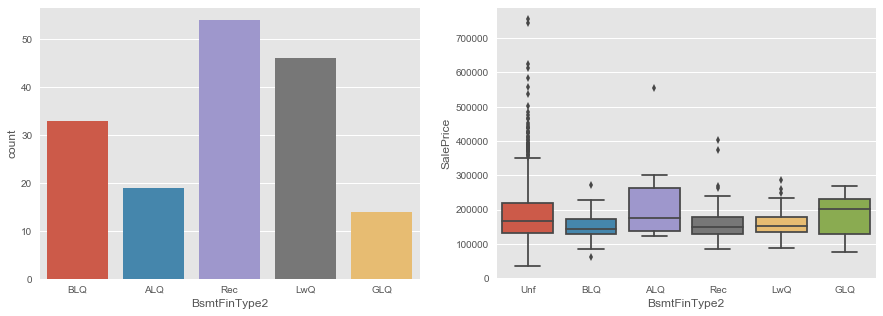

In [24]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
df_notUnf = df_train[df_train["BsmtFinType2"] != "Unf"]["BsmtFinType2"]
sns.countplot(df_notUnf, ax = axes[0])
sns.boxplot(x = "BsmtFinType2", y = "SalePrice", data = df_train, ax = axes[1])

In [25]:
df_train.groupby(["BsmtFinType2"])["SalePrice"].agg(["mean", "std", "median", "max", "min"])

,mean,std,median,max,min
BsmtFinType2,,,,,
ALQ,209942.105263,104764.743411,174900,555000,123500
BLQ,151101.000000,41611.305388,143000,271900,62383
GLQ,180982.142857,64573.040359,203125,270000,75500
LwQ,164364.130435,43255.035241,154000,287000,88000
Rec,164917.129630,59183.277020,148750,402000,85000
Unf,184694.690287,81275.313909,167000,755000,34900


##### 2. 결측값 (BsmtExposure)

In [26]:
df_train.loc[948]["SalePrice"]

192500

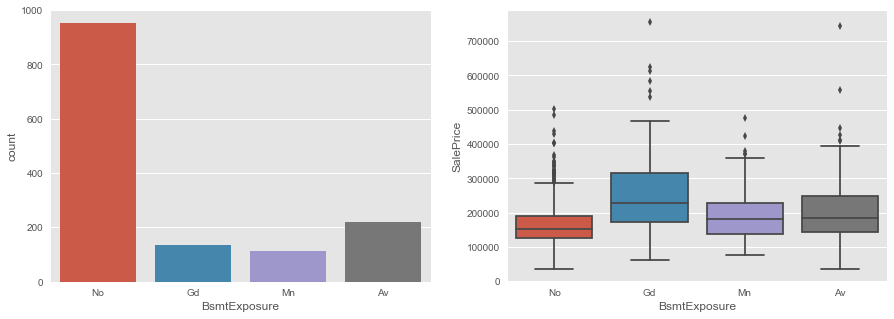

In [27]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
df_notNA = df_train[df_train["BsmtExposure"] != "NA"]["BsmtExposure"]
sns.countplot(df_notNA, ax = axes[0])
sns.boxplot(x = "BsmtExposure", y = "SalePrice", data = df_train, ax = axes[1])

In [28]:
df_train.groupby(["BsmtExposure"])["SalePrice"].agg(["mean", "std", "median", "max", "min"])

,mean,std,median,max,min
BsmtExposure,,,,,
Av,206643.420814,88655.504849,185850,745000,35311
Gd,257689.805970,118923.672583,226975,755000,61000
Mn,192789.657895,77335.442652,182450,475000,78000
No,165652.295908,60695.724915,154000,501837,34900


##### 처리방안

##### 1. 결측값 (BsmtFinType2)

BsmtFinType2의 분포를 보면 Unf를 제외하고 3.7%가 Rec으로 최빈값 Rec로 대체한다.

##### 2. 결측값 (BsmtExposure)

BsmtExposure의 분포를 보면 65%가 No임으로 최빈값 No로 대체한다.

# Treat missing values

In [ ]:
# missing value 처리
df_train.loc[1379, "Electrical"] = "SBrkr"

df_train["MasVnrType"].fillna("None", inplace = True)
df_train["MasVnrArea"].fillna("None", inplace = True)

df_train["BsmtQual"].fillna("None", inplace = True)
df_train["BsmtCond"].fillna("None", inplace = True)
df_train["BsmtFinType1"].fillna("None", inplace = True)
df_train["BsmtFinType2"].fillna("None", inplace = True)
df_train["BsmtExposure"].fillna("None", inplace = True)
df_train.loc[332, "BsmtFinType2"] = "Rec"
df_train.loc[948, "BsmtExposure"] = "No"

df_train["PoolQC"].fillna("None", inplace = True)

df_train["MiscFeature"].fillna("None", inplace = True)

df_train["Alley"].fillna("None", inplace = True)

df_train["Fence"].fillna("None", inplace = True)

df_train["FireplaceQu"].fillna("None", inplace = True)

df_train["GarageYrBlt"].fillna("None", inplace = True)
df_train["GarageType"].fillna("None", inplace = True)
df_train["GarageFinish"].fillna("None", inplace = True)
df_train["GarageQual"].fillna("None", inplace = True)
df_train["GarageCond"].fillna("None", inplace = True)

isnullLotFrontage = df_train["LotFrontage"].isnull()
sqrtLotArea = np.sqrt(df_train.loc[isnullLotFrontage].LotArea)
df_train.loc[isnullLotFrontage, "LotFrontage"] = np.sqrt(df_train.loc[isnullLotFrontage, "LotArea"])

df_train.isnull().sum().sort_values(ascending = False).tail()